<a href="https://colab.research.google.com/github/ljin520/ML-Learning/blob/main/CS6120_ASSIGNMENT2_Jing_Luo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW2 Summary

Translation and Feature Extraction
Steps
1.  Find three author ids
2.  Find the four top papers for each author id. it is possible that some author has less than 4 papers, so we need to take care the corn case.
3.  Get their titles and abstracts.
4.  Translate the titles and abstracts to Chinese and back to English, as well  as French.
5.  Plot cosine similarities of all titles and abstracts papers using allenai/specter2_base model, ZH and FR both with imshow as well as boxplot.

Questions:
Does translation do anything to the vectors? Does translation make the vectors better or worse (or does it do nothing at all)? Are the French translations better or worse than the Chinese translations for comparing papers? How would we make that question precise?

Ans:

1. Translation does affect the vectors. It can change the representations, potentially for better or worse, depending on the quality of translation. Some information might be lost in the translation process.
2. It depends on the specific use case. Better or worse is relative. Translation can help or hurt, depending on whether it preserves the key information in the titles and abstracts.
3. French translation is better than Chinese for those papers, when I used cosine similarity. Look at the pictures at the last.

Fill-Mask Task
  1. Using bert-base-uncased model
  2. Using roberta-base model
  3. Using distilbert-base-uncased model

In [2]:
!pip install transformers
from transformers import pipeline
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.0 MB/s eta 0:00:00


In [2]:
def string_to_specter(string):
  specter = pipeline("feature-extraction", model = "allenai/specter2_base")
  return specter(string, return_tensors = "pt")[:,0,:].detach().numpy().reshape(-1)

In [3]:
import json,requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import complete,leaves_list

In [4]:
REQUEST_PREFIX_A = 'https://api.semanticscholar.org/graph/v1/author/search?query='
REQUEST_SUFIX_A = '&fields=name,citationCount,papers,papers.citationCount'

'''
Build a function to get all the paper Id from a specific name
'''
def getTop3AuthorIdsFromAuthorName(name):
  authorIds = []
  papers = requests.get(REQUEST_PREFIX_A + name + REQUEST_SUFIX_A).json()
  print(papers)
  for each in papers['data']:
    if each['name'] == name:
      authorIds.append([each['citationCount'], each['name'], each['authorId'], each['papers']])
  authorIds.sort(reverse=True)
  Top3AuthorIds = []
  for i in range(3):
    Top3AuthorIds.append(authorIds[i])
  return Top3AuthorIds

res = getTop3AuthorIdsFromAuthorName('Noah Smith')
print(res)



{'total': 42, 'offset': 0, 'data': [{'authorId': '47441462', 'name': 'Noah H. Smith', 'citationCount': 46, 'papers': [{'paperId': '2a3d53564010da594c422fad8ac76a1b032fb7d0', 'citationCount': 3}, {'paperId': '5e3963d924114d1c5aa4f5b70ea19478584b4c88', 'citationCount': 0}, {'paperId': '14e943a6d354c265f953cc0db7ed4c596924922c', 'citationCount': 3}, {'paperId': '8451684a22bb16643700f5fd532b5d197d3cc95c', 'citationCount': 3}, {'paperId': 'bc56456d6b7bbeffab5872aa603308ebe6d7f0bc', 'citationCount': 4}, {'paperId': 'd1a0bfcaf7bbe409fc68008575842a53fe72c1be', 'citationCount': 0}, {'paperId': '114672130e620560a30881aee3f3c3d4aff905a9', 'citationCount': 2}, {'paperId': '4c09cd386142b514a6382f81ae171378e6442416', 'citationCount': 0}, {'paperId': 'ca80ef5840ee59572bc135bff398a345848e6dc4', 'citationCount': 5}, {'paperId': 'f720e06670dd43a3e4a61eda738e8078247071e6', 'citationCount': 26}]}, {'authorId': '1685669', 'name': 'Noah A. Smith', 'citationCount': 3244, 'papers': [{'paperId': '17fbffb05fa14

In [5]:
'''
Build a function to four top papers for three author
like this [[X,Y,Z,D],[A,B,C,D],[E,F,G,H]]
'''
def getTop4PapersIdsForAuthors(Top3AuthorIds):
  TopPaperList = []
  for author in Top3AuthorIds:
    papers = author[3]
    papersList = []
    for each in papers:
      papersList.append([each['citationCount'],each['paperId']])
    papersList.sort(reverse=True)
    topPaperIds = []
    for i in range(min(4,len(papersList))):
      topPaperIds.append(papersList[i][1])
    print(topPaperIds)
    TopPaperList.append(topPaperIds)
  return TopPaperList

TopList = getTop4PapersIdsForAuthors(res)


[['3c5f1ab37f70db503636075e15b3173f86eea00b',
  '00df5cf0d83c48657d453ab8083d8805a67f744f',
  'f10a04a77fd1cd719792de374a60f3fd03f6b944',
  'ae6a6fd05938804a93649326b822e7d11cee2772'],
 ['db6ccee4ed1be2493047bc9e9b19a23cbf8f8030',
  '99e3a39c2e0227f5f26e14fa32bb18b6740959b0'],
 ['216f2ff59c4a0b259f39fcad7c1a317379aa3436',
  '9660d6ac1468c34ec3cb3befe10bcf04f66fe41e',
  'ed8dc0ee55b4ac6073dc1f1e2e4b011f2cd320f8',
  'de1660892c7ce6065ccbf91ecedbfd11abb40ba2']]

In [6]:
# Get their titles and abstracts.
REQUEST_PREFIX_B = 'https://api.semanticscholar.org/graph/v1/paper/'
REQUEST_SUFIX_B = '?fields=title,embedding,citationCount,title,abstract'

def getTitleandAbstract(TopList):
  title_abstract_list = []
  for eachList in TopList:
    for paperId in eachList:
      paperMap = requests.get(REQUEST_PREFIX_B + paperId + REQUEST_SUFIX_B).json()
      print(paperMap['title'])
      print(paperMap['abstract'])
      title_abstract_list.append([paperMap['title'],paperMap['abstract']])
  return title_abstract_list

title_abstract_list = getTitleandAbstract(TopList)

Green AI
The computations required for deep learning research have been doubling every few months, resulting in an estimated 300,000x increase from 2012 to 2018 [2]. These computations have a surprisingly large carbon footprint [38]. Ironically, deep learning was inspired by the human brain, which is remarkably energy efficient. Moreover, the financial cost of the computations can make it difficult for academics, students, and researchers, in particular those from emerging economies, to engage in deep learning research. This position paper advocates a practical solution by making efficiency an evaluation criterion for research alongside accuracy and related measures. In addition, we propose reporting the financial cost or"price tag"of developing, training, and running models to provide baselines for the investigation of increasingly efficient methods. Our goal is to make AI both greener and more inclusive---enabling any inspired undergraduate with a laptop to write high-quality researc

In [ ]:
!pip install sentencepiece
import os
os.kill(os.getpid(), 9)

In [8]:
!pip install sentencepiece
titles = []
abstracts = []
i = 0
en_fr = pipeline('translation', model = "Helsinki-NLP/opus-mt-en-fr")
fr_en = pipeline('translation', model = "Helsinki-NLP/opus-mt-fr-en")
en_zh = pipeline('translation', model = "Helsinki-NLP/opus-mt-en-zh")
zh_en = pipeline('translation', model = "Helsinki-NLP/opus-mt-zh-en")

def translate(string, mypipeline):
  res = mypipeline(string)
  if res:
    return res[0]['translation_text']
  return "error"

for eachList in title_abstract_list:
  title = eachList[0]
  abstract = eachList[1]
  i += 1
  print(i)
  en_fr_title = translate(title, en_fr)
  fr_en_title = translate(en_fr_title, fr_en)
  en_zh_title = translate(title, en_zh)
  zh_en_title = translate(en_zh_title, zh_en)

  en_fr_abstract = translate(abstract, en_fr) if abstract else "No abstract"
  fr_en_abstract = translate(en_fr_abstract, fr_en) if abstract else "No abstract"
  en_zh_abstract = translate(abstract, en_zh) if abstract else "No abstract"
  zh_en_abstract = translate(en_zh_abstract, zh_en) if abstract else "No abstract"

  titles.append([title,en_fr_title,fr_en_title,en_zh_title,zh_en_title])
  abstracts.append([abstract,en_fr_abstract,fr_en_abstract,en_zh_abstract,zh_en_abstract])

titles
abstracts

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


1
2
3
4
5
6
7
8
9
10


[['The computations required for deep learning research have been doubling every few months, resulting in an estimated 300,000x increase from 2012 to 2018 [2]. These computations have a surprisingly large carbon footprint [38]. Ironically, deep learning was inspired by the human brain, which is remarkably energy efficient. Moreover, the financial cost of the computations can make it difficult for academics, students, and researchers, in particular those from emerging economies, to engage in deep learning research. This position paper advocates a practical solution by making efficiency an evaluation criterion for research alongside accuracy and related measures. In addition, we propose reporting the financial cost or"price tag"of developing, training, and running models to provide baselines for the investigation of increasingly efficient methods. Our goal is to make AI both greener and more inclusive---enabling any inspired undergraduate with a laptop to write high-quality research pape

In [9]:
titles

[['Green AI', 'IA verte', 'Green IA', '绿AI 绿色AI', 'Green AI Green AI'],
 ['Measuring the Carbon Intensity of AI in Cloud Instances',
  "Mesure de l'intensité en carbone de l'IA dans les instances en nuage",
  'Measurement of AI carbon intensity in cloud instances',
  '测量AI在云中测量碳密度',
  "Measuring AI's carbon density in clouds"],
 ['Effects of Parameter Norm Growth During Transformer Training: Inductive Bias from Gradient Descent',
  'Effets de la croissance des normes de paramètres pendant la formation des transformateurs : les biais inductifs de la descente progressive',
  'Effects of growth of parameter standards during transformer formation: inductive biases of progressive descent',
  '变形培训期间的参数诺姆增长效应:从梯子源的诱导偏见',
  'The Norm Growth Effect for Parameters during Transformation Training: Inducing Prejudice from Ladder Sources'],
 ['Analysis of the Dependency of Call Duration on the Quality of VoIP Calls',
  "Analyse de la dépendance de la durée d'appel sur la qualité des appels VoIP",
 

In [10]:
abstracts

[['The computations required for deep learning research have been doubling every few months, resulting in an estimated 300,000x increase from 2012 to 2018 [2]. These computations have a surprisingly large carbon footprint [38]. Ironically, deep learning was inspired by the human brain, which is remarkably energy efficient. Moreover, the financial cost of the computations can make it difficult for academics, students, and researchers, in particular those from emerging economies, to engage in deep learning research. This position paper advocates a practical solution by making efficiency an evaluation criterion for research alongside accuracy and related measures. In addition, we propose reporting the financial cost or"price tag"of developing, training, and running models to provide baselines for the investigation of increasingly efficient methods. Our goal is to make AI both greener and more inclusive---enabling any inspired undergraduate with a laptop to write high-quality research pape

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt


specter2_base_pipe = pipeline("feature-extraction", model="allenai/specter2_base")
def text_to_specter(s):
  return specter2_base_pipe(s, return_tensors = "pt")[:,0,:].detach().numpy().reshape(-1)

<ipython-input-17-5f08082cdb58>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


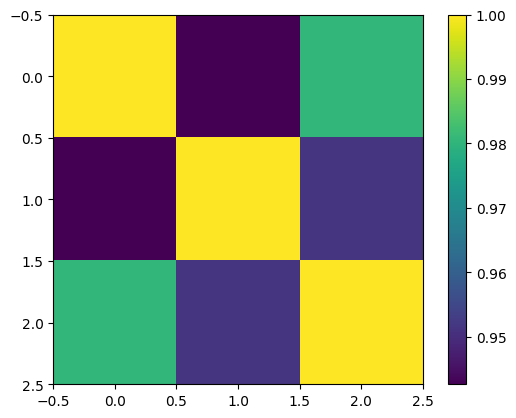

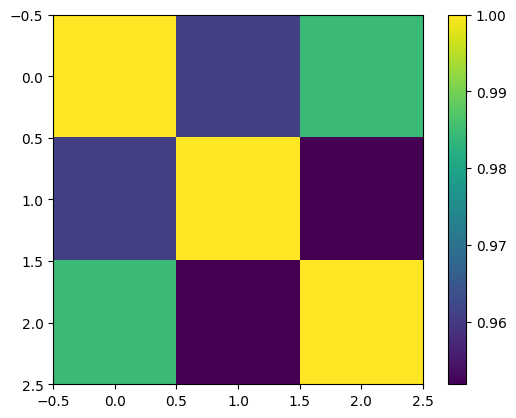

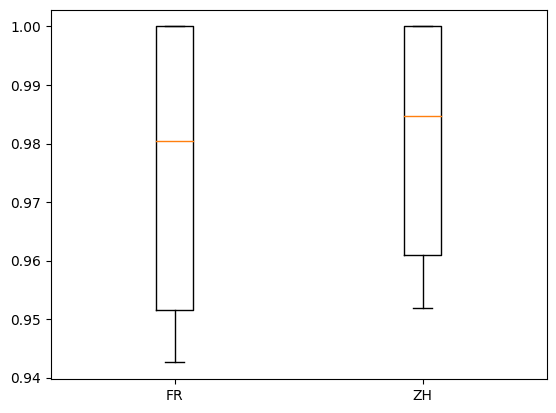

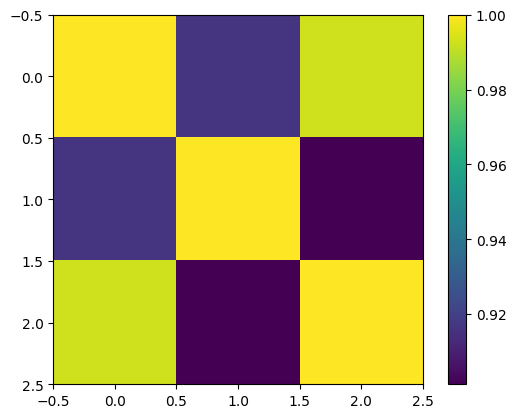

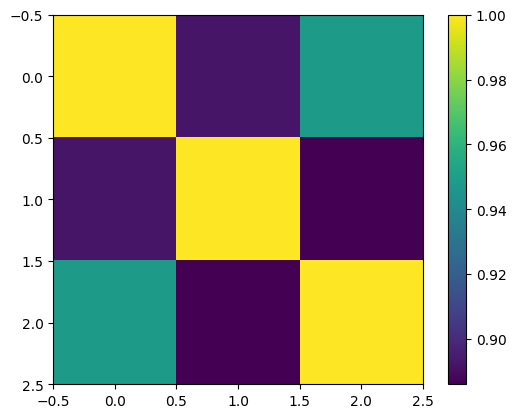

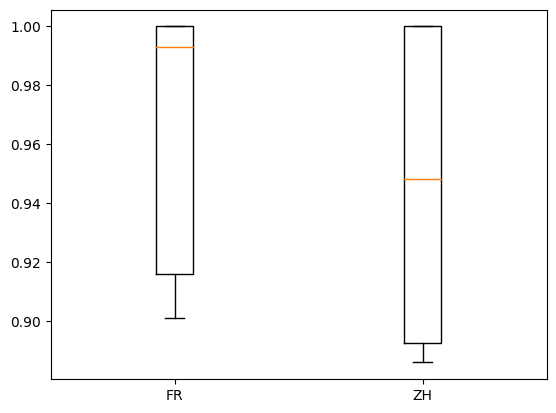

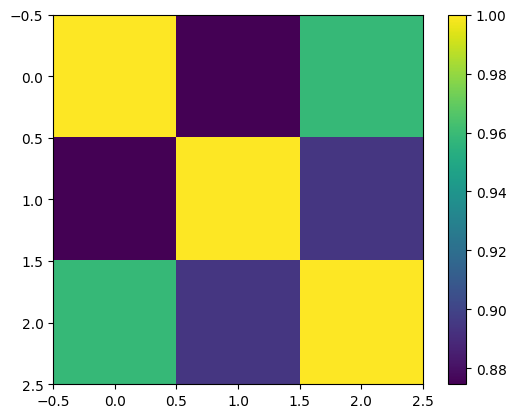

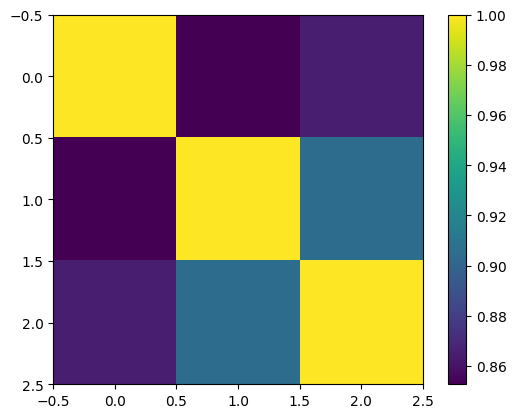

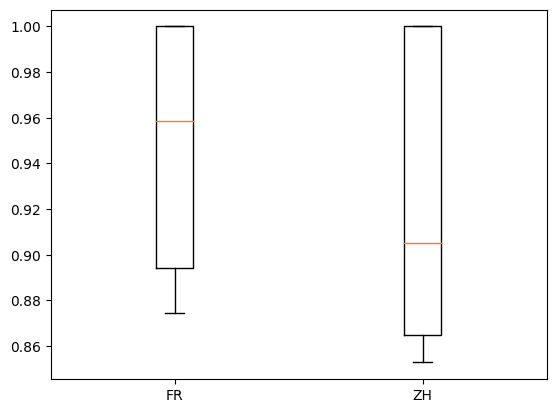

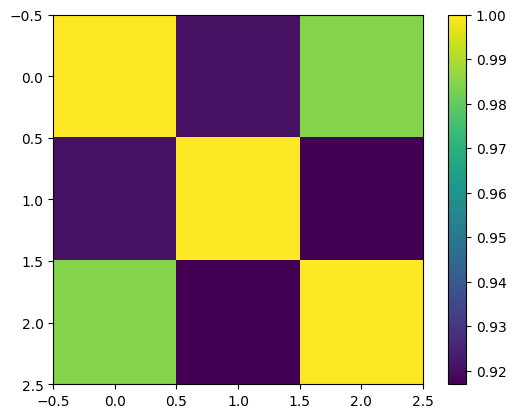

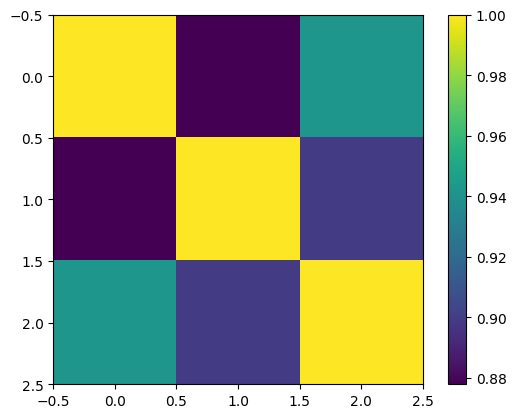

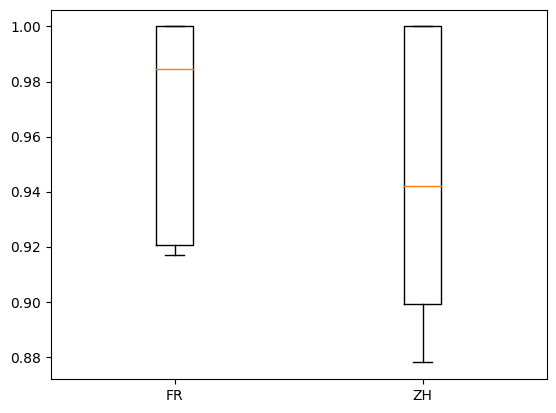

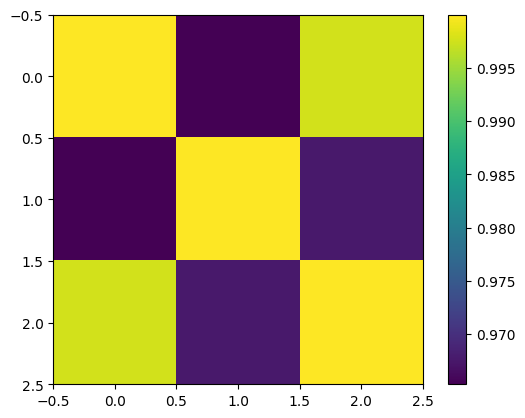

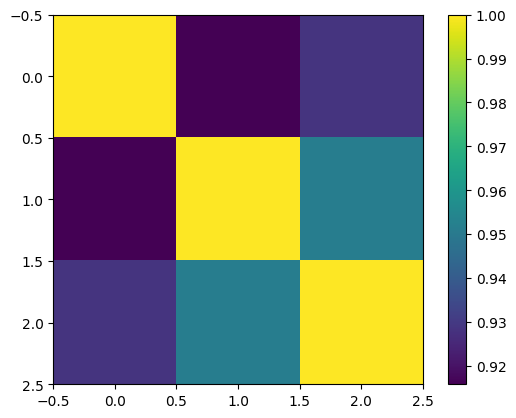

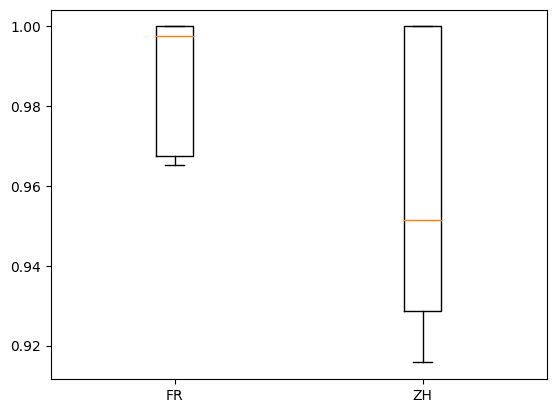

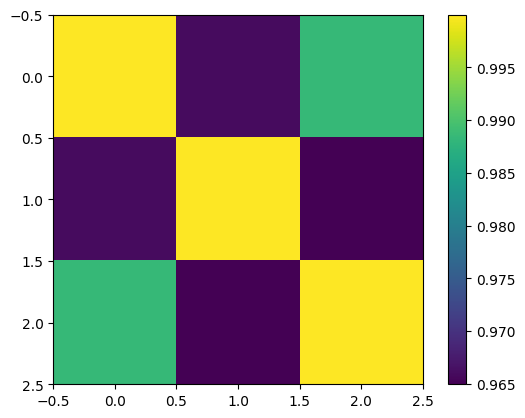

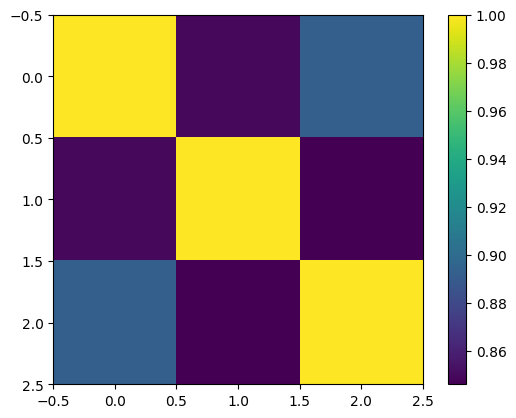

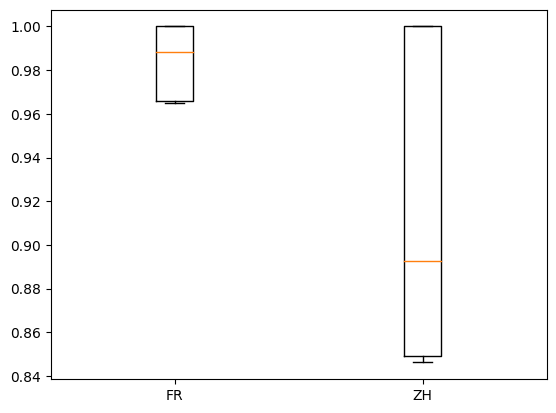

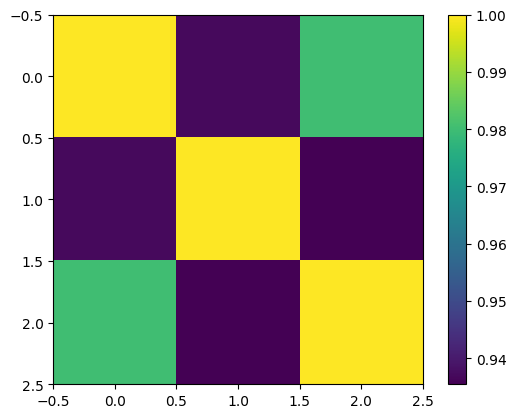

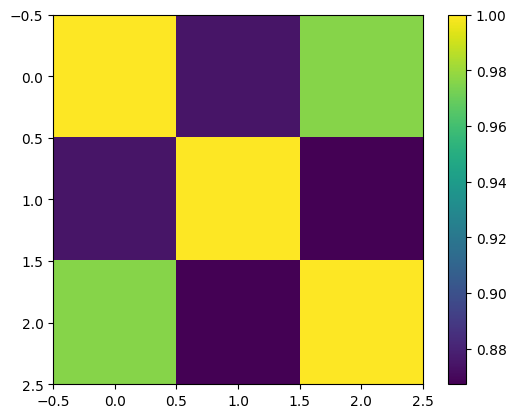

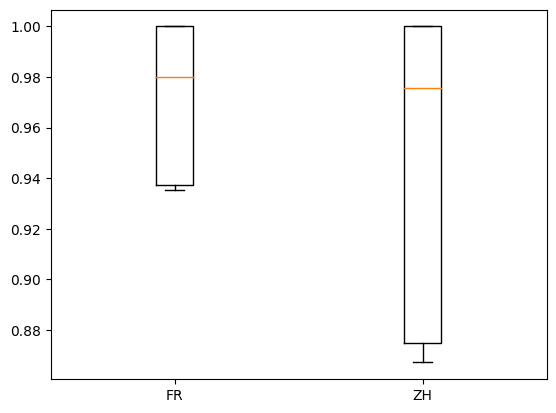

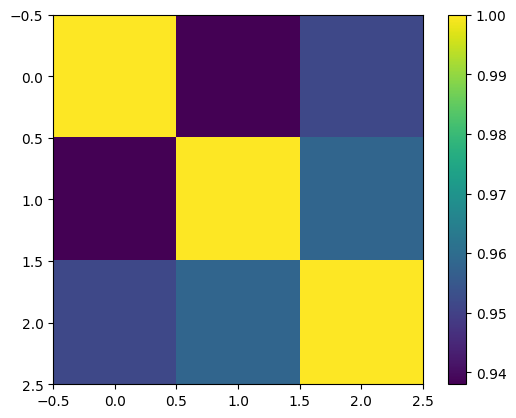

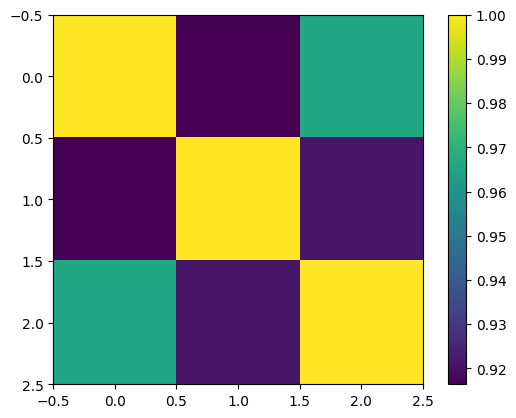

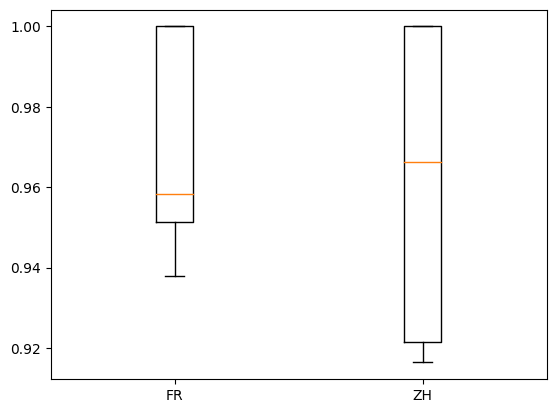

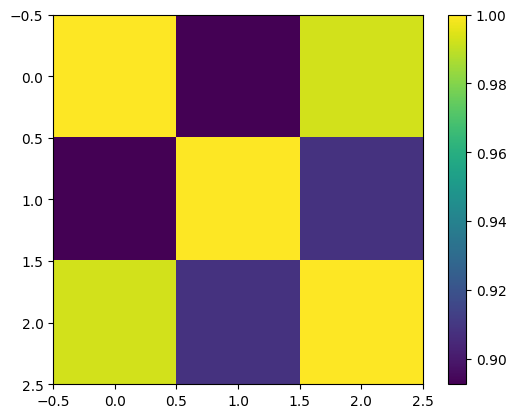

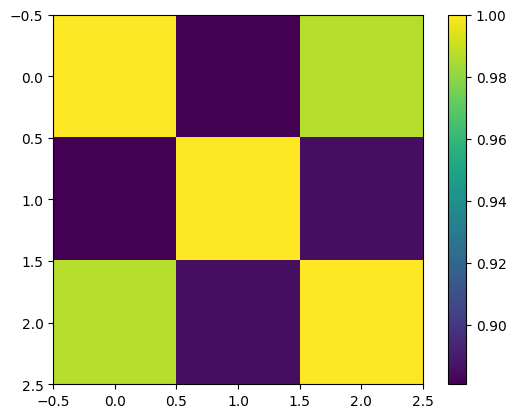

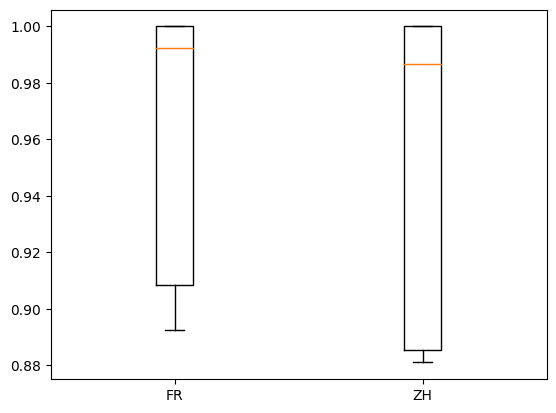

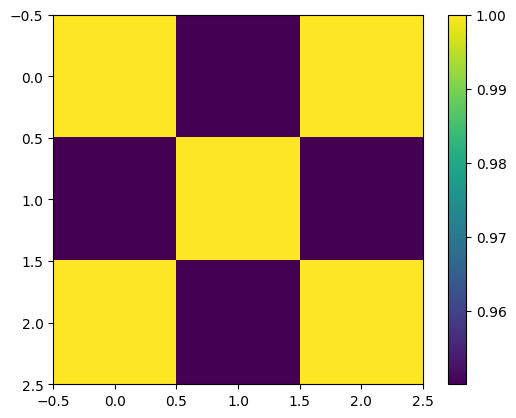

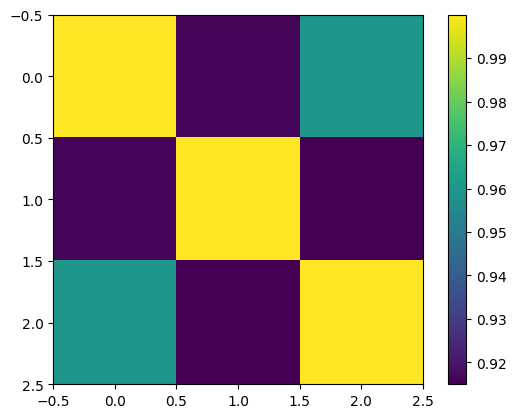

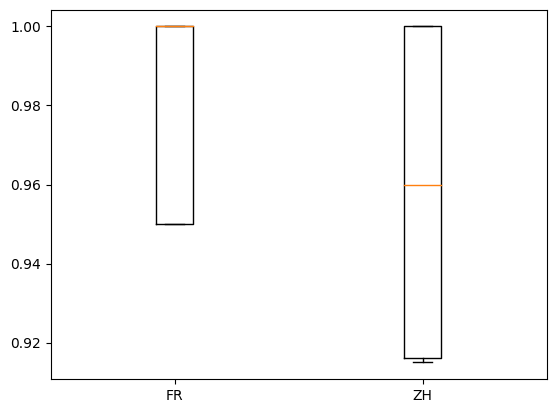

In [17]:
for title in titles:
  orginal_title_vec = text_to_specter(title[0])
  en_fr_title_vec = text_to_specter(title[1])
  fr_en_title_vec = text_to_specter(title[2])
  en_zh_title_vec = text_to_specter(title[3])
  zh_en_title_vec = text_to_specter(title[4])
  sim_fr = cosine_similarity([orginal_title_vec, en_fr_title_vec, fr_en_title_vec])
  sim_zh = cosine_similarity([orginal_title_vec, en_zh_title_vec, zh_en_title_vec])
  plt.figure()
  plt.imshow(sim_fr)
  plt.colorbar()
  plt.figure()
  plt.imshow(sim_zh)
  plt.colorbar()
  plt.figure()
  plt.boxplot([sim_fr.reshape(-1),sim_zh.reshape(-1)], labels=["FR","ZH"])

<ipython-input-18-a1d290102cae>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


The article Land Grant Application- Smith, Noah (Hollis) does not have an abstract
The article Psychoanalytic Denial and Projection in Edgar Allan Poe's Short Fiction does not have an abstract


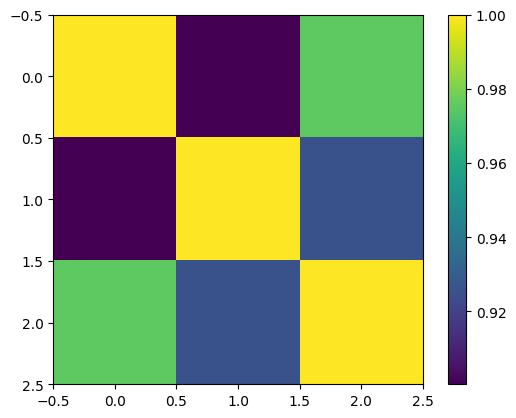

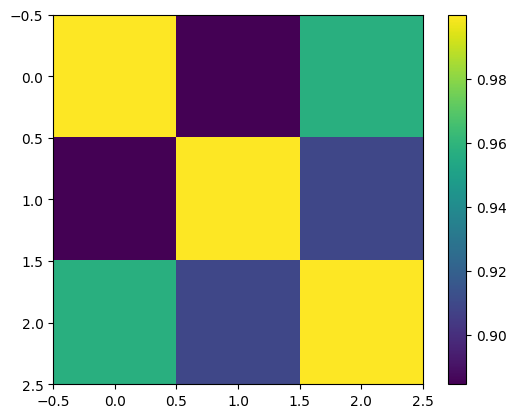

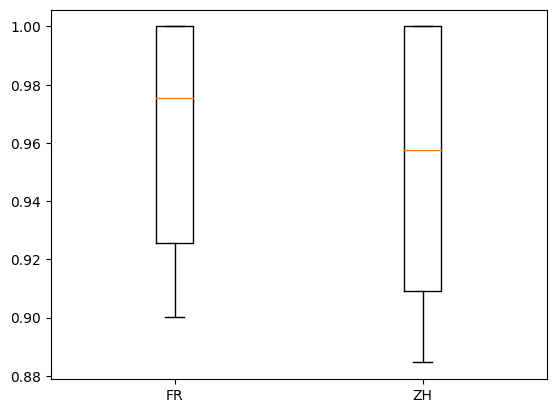

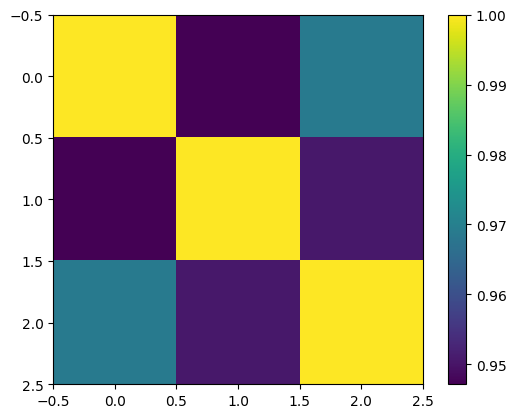

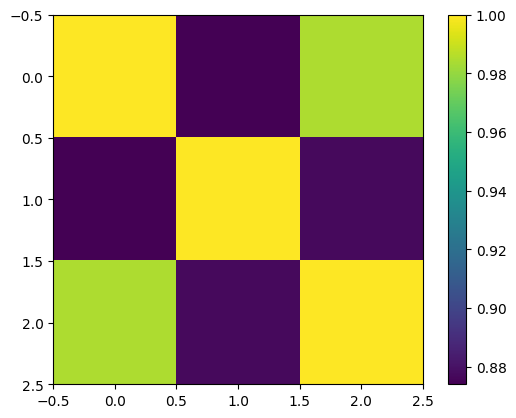

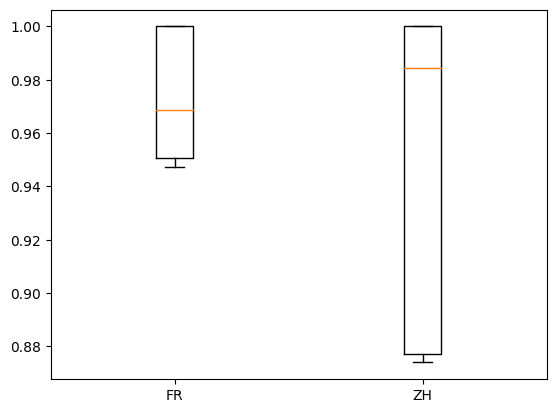

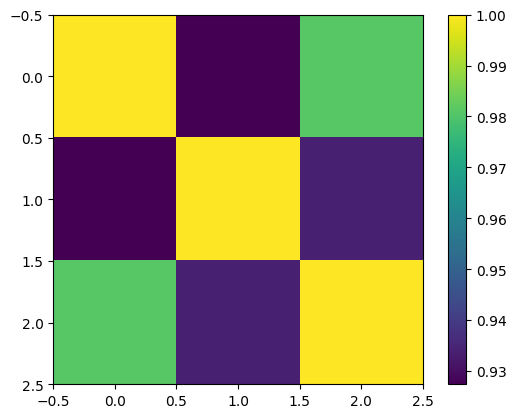

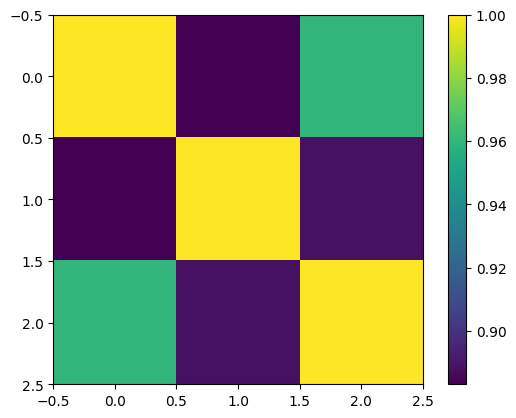

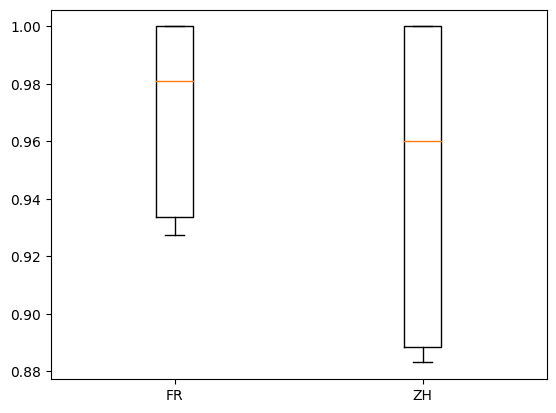

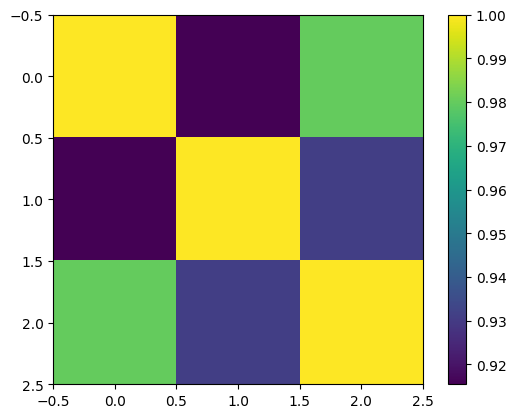

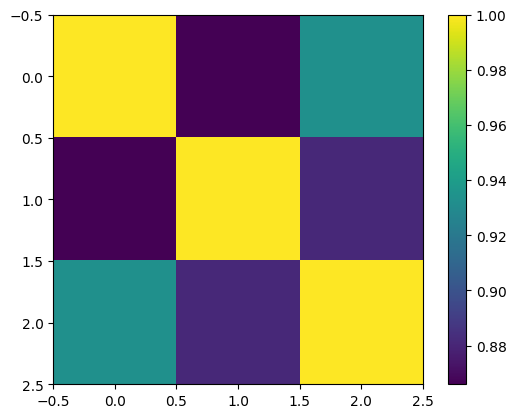

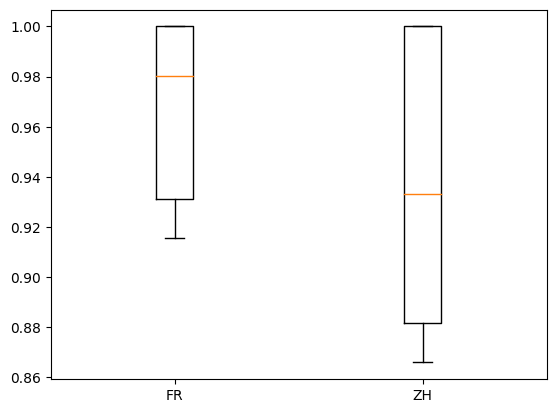

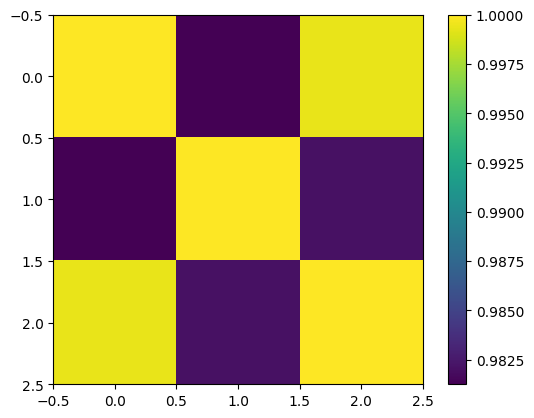

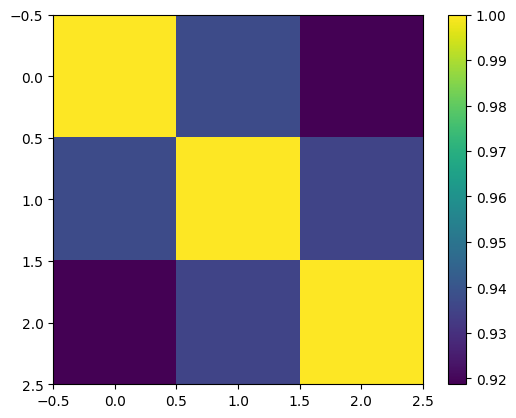

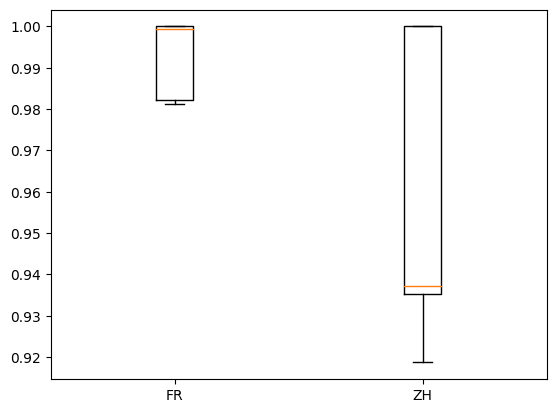

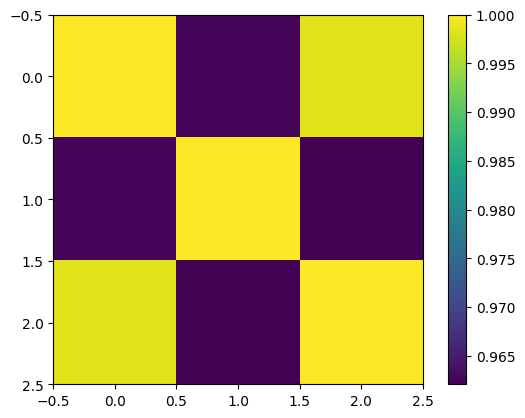

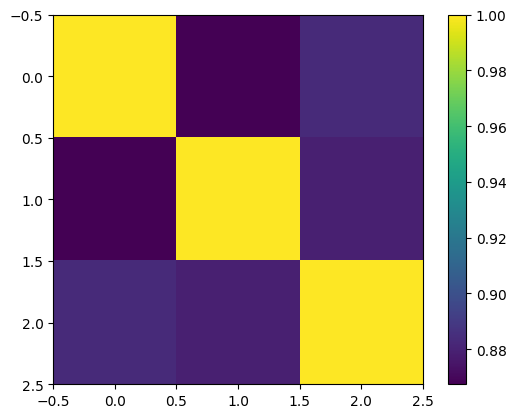

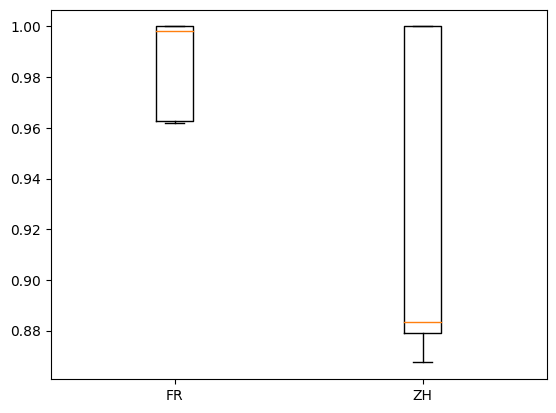

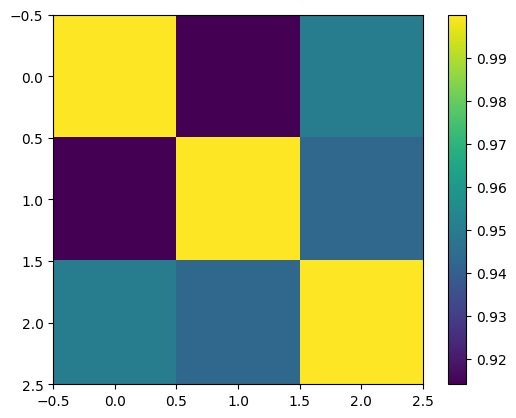

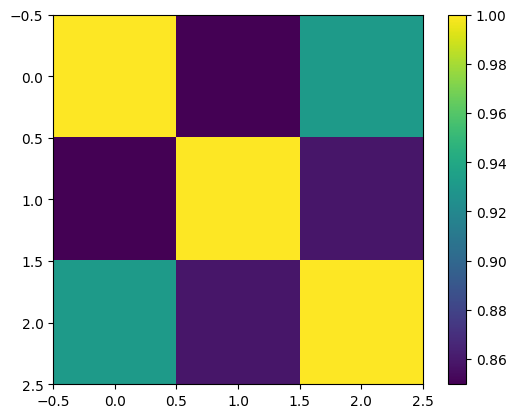

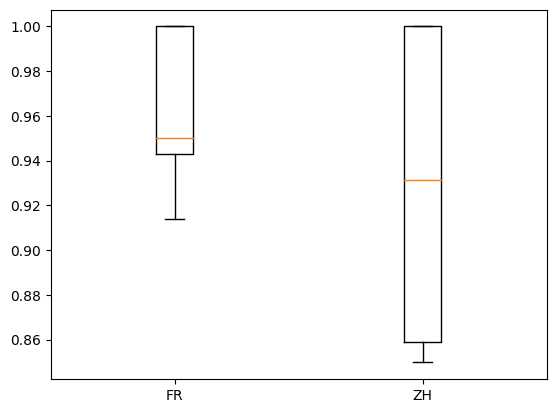

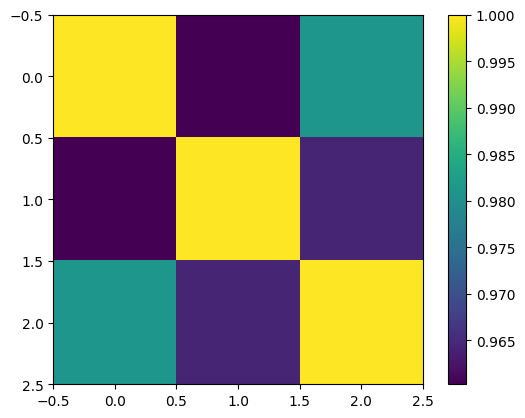

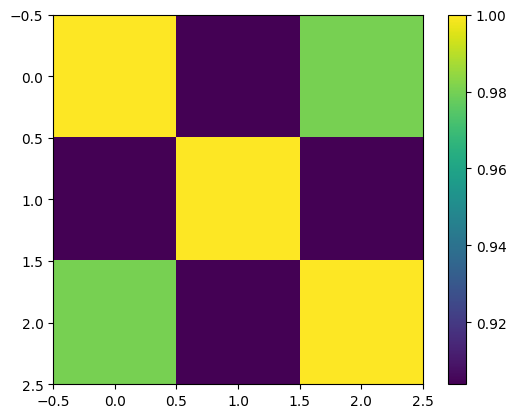

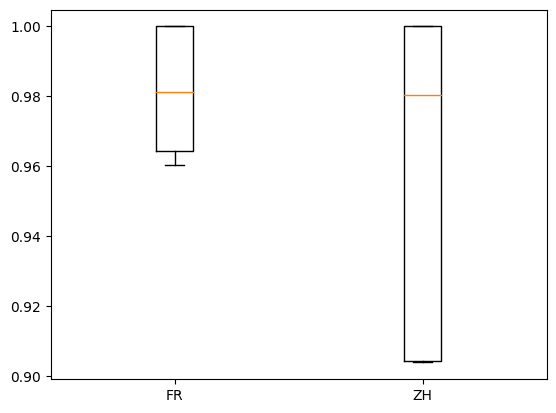

In [18]:
for i in range(len(abstracts)):
  if abstracts[i] and abstracts[i][0]:
    orginal_abstract_vec = text_to_specter(abstracts[i][0])
    en_fr_abstract_vec = text_to_specter(abstracts[i][1])
    fr_en_abstract_vec = text_to_specter(abstracts[i][2])
    en_zh_abstract_vec = text_to_specter(abstracts[i][3])
    zh_en_abstract_vec = text_to_specter(abstracts[i][4])
    sim_fr_abs = cosine_similarity([orginal_abstract_vec, en_fr_abstract_vec, fr_en_abstract_vec])
    sim_zh_abs = cosine_similarity([orginal_abstract_vec, en_zh_abstract_vec, zh_en_abstract_vec])
    plt.figure()
    plt.imshow(sim_fr_abs)
    plt.colorbar()
    plt.figure()
    plt.imshow(sim_zh_abs)
    plt.colorbar()
    plt.figure()
    plt.boxplot([sim_fr_abs.reshape(-1),sim_zh_abs.reshape(-1)], labels=["FR","ZH"])
  else:
    print('The article ' + titles[i][0] + ' does not have an abstract')

Fill-Mask Task


In [16]:
# Initialization
strA = 'This is a test of the emergency broadcast system'
strB = 'We are a pain in the neck for NLP'
bert_fill_mask = pipeline("fill-mask", model="bert-base-uncased")
roberta_fill_mask = pipeline("fill-mask", model="roberta-base")
distilbert_fill_mask = pipeline("fill-mask", model="distilbert-base-uncased")


def doTask(modelName,string,PATTERN):
  strAList = string.split(" ")
  print("{:<20} {:<20} {:<20} {:<20}".format("WORD", "RANK0", "RANK1", "RANK2"))
  for i in range(len(strAList)):
    curStr = " ".join(strAList[:i] + [PATTERN] + strAList[i+1:])
    curRes = modelName(curStr)
    res = []
    for each in curRes:
      res.append([str('%.2f'%each['score']),str(each['token_str'])])
      res.sort(reverse=True)
    print("{:<20} {:<20} {:<20} {:<20}".format(strAList[i], res[0][1]+":"+res[0][0], res[1][1]+":"+res[1][0], res[2][1]+":"+res[2][0]))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
# Bert model
doTask(bert_fill_mask, strA, "[MASK]")

WORD                 RANK0                RANK1                RANK2               
This                 this:0.64            it:0.32              there:0.01          
is                   was:0.54             is:0.44              includes:0.00       
a                    a:0.94               the:0.02             another:0.02        
test                 part:0.24            subset:0.12          variation:0.06      
of                   of:0.83              for:0.12             on:0.02             
the                  the:0.90             an:0.06              your:0.00           
emergency            radio:0.28           television:0.08      tv:0.03             
broadcast            braking:0.65         response:0.07        management:0.04     
system               .:0.94               ;:0.06               |:0.00              


In [18]:
# Roberta model
doTask(roberta_fill_mask, strA, "<mask>")

WORD                 RANK0                RANK1                RANK2               
This                 This:0.46            Here:0.39            Below:0.12          
is                    is:0.86              was:0.14             shows:0.00         
a                     a:0.97               another:0.02         the:0.01           
test                  diagram:0.17         description:0.13     schematic:0.08     
of                    of:0.96              using:0.01           for:0.01           
the                   the:0.70             an:0.17              our:0.10           
emergency             new:0.05             radio:0.03           microwave:0.03     
broadcast             response:0.51        alert:0.07           management:0.05    
system               ::0.56               .:0.38                system:0.00        


In [20]:
# Distilbert model
doTask(distilbert_fill_mask, strA, "[MASK]")

WORD                 RANK0                RANK1                RANK2               
This                 this:0.33            below:0.21           it:0.04             
is                   is:0.33              was:0.09             includes:0.08       
a                    a:0.59               the:0.06             another:0.06        
test                 summary:0.40         list:0.13            description:0.10    
of                   of:0.23              on:0.19              using:0.14          
the                  an:0.29              the:0.09             your:0.01           
emergency            radio:0.05           digital:0.04         wireless:0.02       
broadcast            braking:0.38         management:0.07      warning:0.06        
system               .:0.43               ::0.13               ;:0.09              


In [21]:
# Bert model
doTask(bert_fill_mask, strB, "[MASK]")

WORD                 RANK0                RANK1                RANK2               
We                   there:0.27           they:0.24            these:0.06          
are                  have:0.32            had:0.18             got:0.12            
a                    a:0.56               in:0.17              the:0.07            
pain                 pain:0.37            needle:0.31          hole:0.04           
in                   in:0.99              on:0.01              to:0.00             
the                  the:0.97             your:0.01            our:0.01            
neck                 ass:0.97             butt:0.02            neck:0.00           
for                  .:0.77               !:0.05               ,:0.04              
NLP                  .:0.76               !:0.09               ?:0.07              


In [22]:
# Roberta model
doTask(roberta_fill_mask, strB, "<mask>")

WORD                 RANK0                RANK1                RANK2               
We                   They:0.45            You:0.09             These:0.04          
are                  're:0.56              are:0.28             were:0.06          
a                     a:0.94               the:0.01             another:0.01       
pain                  pain:0.99            shot:0.00            lump:0.00          
in                    in:1.00              to:0.00              on:0.00            
the                   the:0.99             your:0.00            their:0.00         
neck                  ass:0.74             butt:0.15            neck:0.10          
for                  .:0.23                -:0.14              ::0.08              
NLP                   them:0.14            everyone:0.13        you:0.11           


In [23]:
# Distilbert model
doTask(distilbert_fill_mask, strB, "[MASK]")

WORD                 RANK0                RANK1                RANK2               
We                   there:0.84           these:0.01           symptoms:0.01       
are                  got:0.16             have:0.10            suffer:0.06         
a                    experiencing:0.15    getting:0.08         causing:0.04        
pain                 thorn:0.07           hole:0.04            tie:0.02            
in                   in:0.48              on:0.07              to:0.05             
the                  your:0.45            my:0.20              the:0.16            
neck                 ass:0.14             heart:0.04           eye:0.04            
for                  .:0.12               …:0.11               ::0.08              
NLP                  .:0.09               ourselves:0.05       ;:0.05              
